
## Черкес Никита 

## Введение
На сегодняшний день каждый родитель обеспокоен успеваемостью его ребенка в школе. В то же время, математика является одним из важнейших предметов, изучаемых в школе, и поэтому от успеваемости ребенка в математике зависит его общая эрудиция и дальнейший карьерный рост, так как в восьмом классе знания математики являются базовыми и основополагающими. В связи с этим мы исследуем, какие факторы взаимосвязанны с успеваемостью ученика по математике.         
Целью работы является изучение взаимосвязи и силы связи различных факторов с балом по математике. Исследование включает в себя: 
1. Подготовка данных и заполнение пропущенных значений
2. Исследование взаимосвязи между успеваемстью по математике и количеством книг дома/наличием компьютера или планшета         
3. Добавление интерактивного эффекта, описывающего желание ученика получить высшее образование и любовь к математике
4. Проведение факторного анализа переменных(EFA), связанных с ресурсами, доступными ребенку, выделение оптимального количества интерпретируемых факторов
5. Визуализация интересных взаимосвязей в данных

Для исследования использовался набор данных TIMSS-2015 (выборка по России) в котором имеется 4780 наблюдений и 437 признаков. 

### 1. Подготовка данных

Считываем данные

In [3]:
data <- read.csv(file="School.csv", header=TRUE, sep=",")

In [4]:
dim(data)

[1] 4780  437

В ходе обзора описания признаков, для анализа были выбранны следующие: 
- возраст - BSDAGE
- пол - ITSEX
- успехи по математике - BSMMAT01
- количество книг дома - BSBG04
- доступность планшета/компьютера - (BSBG06A, BSBG06B)
- переменные, описывающие домашние ресурсы (BSBG06A, BSBG06B, BSBG06C, BSBG06D, BSBG06E, BSBG06F, BSBG06G, BSBG06H, BSBG06I, BSBG06J, BSBG06K)
- образование матери - BSBG07A
- образование отца - BSBG07B
- как далеко ученик хочет пойти в учебе - BSBG08
- как часто ученик пропускает школу - BSBG11
- посещал ли дополнительные уроки по математике - BSBM39AA
- любит ли математику - BSDGSLM
- подвергается ли издевательствам в школе - BSDGSB

In [17]:
library(plyr)

In [5]:
columns = c('BSDAGE', 'ITSEX', 'BSMMAT01', 'BSBG04', 'BSBG06A', 'BSBG06B', 'BSBG06C',  'BSBG06D', 
            'BSBG06E', 'BSBG06F', 'BSBG06G', 'BSBG06H', 'BSBG06I', 'BSBG06J', 'BSBG06K', 'BSBG07A', 
            'BSBG07B', 'BSBG08', 'BSBG11', 'BSBM39AA', 'BSDGSLM', 'BSDGSB')

Выделяем только те признаки, с которыми будем работать

In [148]:
data_main = data[, columns]

Поменяем название переменных и сделаем их факторными, где это нужно 

In [149]:
data_main$age = data_main$BSDAGE # возраст
data_main$sex = revalue(as.factor(data_main$ITSEX), c('1' = 'Female', '2' = 'Male')) # пол
data_main$math_points = data_main$BSMMAT01 # балы по математике
data_main$books = revalue(as.factor(data_main$BSBG04), c('1' = '0-10 books', '2' = '11-25 books', 
                                                         '3' = '26-100 books', '4' = '101-200 books', 
                                                         '5' = '>200 books')) # количество книг дома
data_main$own_device = revalue(as.factor(data_main$BSBG06A), c('1' = 'Yes', '2' = 'No')) # доступен планшет/компьютер
data_main$shared_device = revalue(as.factor(data_main$BSBG06B), c('1' = 'Yes', '2' = 'No')) # планшет/компьютер общий в доме
data_main$table = revalue(as.factor(data_main$BSBG06C), c('1' = 'Yes', '2' = 'No')) # cтол для занятий
data_main$room = revalue(as.factor(data_main$BSBG06D), c('1' = 'Yes', '2' = 'No')) # есть своя комната
data_main$internet = revalue(as.factor(data_main$BSBG06E), c('1' = 'Yes', '2' = 'No')) # доступен интернет
data_main$telephone = revalue(as.factor(data_main$BSBG06F), c('1' = 'Yes', '2' = 'No')) # есть свой телефон
data_main$game_console = revalue(as.factor(data_main$BSBG06G), c('1' = 'Yes', '2' = 'No')) # есть игровая система (PS, Xbox, etc)
data_main$music_ins = revalue(as.factor(data_main$BSBG06H), c('1' = 'Yes', '2' = 'No')) # есть музыкальные инструменты
data_main$family_car = revalue(as.factor(data_main$BSBG06I), c('1' = 'Yes', '2' = 'No')) # есть машина у семье
data_main$big_flat = revalue(as.factor(data_main$BSBG06J), c('1' = 'Yes', '2' = 'No')) # в квартире 4 или более комнат
data_main$dishwasher = revalue(as.factor(data_main$BSBG06K), c('1' = 'Yes', '2' = 'No')) # есть посудомоечная машина
data_main$mother_educ = revalue(as.factor(data_main$BSBG07A), c('1' = 'low', '2' = 'low', '3' = 'low',
                                                                '4' = 'low', '5' = 'low', '6' = 'high',
                                                                '7' = 'high', '8' = 'dontknow')) # образование матери
data_main$father_educ = revalue(as.factor(data_main$BSBG07B), c('1' = 'low', '2' = 'low', '3' = 'low',
                                                                '4' = 'low', '5' = 'low', '6' = 'high',
                                                                '7' = 'high', '8' = 'dontknow')) # образование отца
data_main$ambitions = revalue(as.factor(data_main$BSBG08), c('1' = 'low', '2' = 'low', '3' = 'low',
                                                                '4' = 'low', '5' = 'high', '6' = 'high')) # как далеко хойчет пойти в учебе
data_main$misses_school = revalue(as.factor(data_main$BSBG11), c('1' = 'Once a week or more', 
                                                                 '2' = 'Once every two weeks', 
                                                                 '3' = 'Once a month',
                                                                 '4' = 'Never or almost never')) # как часто пропускает школу
data_main$additional_math = revalue(as.factor(data_main$BSBM39AA), c('1' = 'Yes, to excel in class', 
                                                                '2' = 'Yes, to keep in class',
                                                                '3' = 'No')) # посещал ли дополнительные зантия
data_main$like_math = revalue(as.factor(data_main$BSDGSLM), c('1' = 'Very Much Like Learning Math', 
                                                              '2' = 'Like Learning Mathematics',
                                                              '3' = 'Not Like Learning Math')) # любит математику
data_main$bullying = revalue(as.factor(data_main$BSDGSB), c('1' = 'Almost Never', 
                                                            '2' = 'About Monthly',
                                                            '3' = 'About Weekly')) # издевательства в школе


The following `from` values were not present in `x`: 4


In [150]:
columns_main = c('age', 'sex', 'math_points', 'books', 'own_device', 'shared_device', 'table',  'room', 
            'internet', 'telephone', 'game_console', 'music_ins', 'family_car', 'big_flat', 'dishwasher', 
            'mother_educ',  'father_educ', 'ambitions', 'misses_school', 'additional_math', 'like_math', 
            'bullying')

In [151]:
data_main = data_main[, columns_main]

In [152]:
sapply(data_main, levels)

$age
NULL

$sex
[1] "Female" "Male"  

$math_points
NULL

$books
[1] "0-10 books"    "11-25 books"   "26-100 books"  "101-200 books"
[5] ">200 books"   

$own_device
[1] "Yes" "No" 

$shared_device
[1] "Yes" "No" 

$table
[1] "Yes" "No" 

$room
[1] "Yes" "No" 

$internet
[1] "Yes" "No" 

$telephone
[1] "Yes" "No" 

$game_console
[1] "Yes" "No" 

$music_ins
[1] "Yes" "No" 

$family_car
[1] "Yes" "No" 

$big_flat
[1] "Yes" "No" 

$dishwasher
[1] "Yes" "No" 

$mother_educ
[1] "low"      "high"     "dontknow"

$father_educ
[1] "low"      "high"     "dontknow"

$ambitions
[1] "low"  "high"

$misses_school
[1] "Once a week or more"   "Once every two weeks"  "Once a month"         
[4] "Never or almost never"

$additional_math
[1] "Yes, to excel in class" "Yes, to keep in class"  "No"                    

$like_math
[1] "Very Much Like Learning Math" "Like Learning Mathematics"   
[3] "Not Like Learning Math"      

$bullying
[1] "Almost Never"  "About Monthly" "About Weekly" 


### Работа с пропущенными значениями

In [7]:
library(mi)

Warning message:
"package 'mi' was built under R version 3.4.3"Loading required package: Matrix
Loading required package: stats4
mi (Version 1.0, packaged: 2015-04-16 14:03:10 UTC; goodrich)
mi  Copyright (C) 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015 Trustees of Columbia University
This program comes with ABSOLUTELY NO WARRANTY.
This is free software, and you are welcome to redistribute it
under the General Public License version 2 or later.
Execute RShowDoc('COPYING') for details.


In [43]:
na_df = missing_data.frame(data_main)

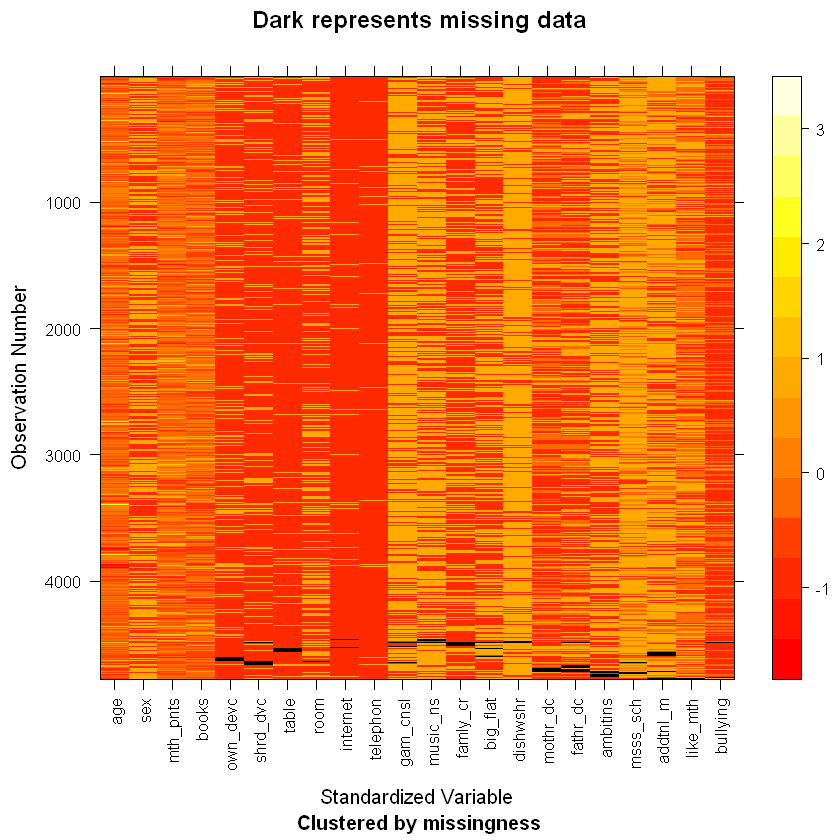

In [45]:
image(na_df)

Черный цвет отображаем пропущенные значения

In [46]:
na_df = mi(na_df, n.iter = 50, n.chains = 4, max.minutes = 10)

In [47]:
Rhats(na_df)[Rhats(na_df) > 1.05]

mean_telephone   sd_telephone 
      1.083718       1.083417

Rhats меньше 1.1, поэтому всё окей.

In [110]:
data.frames = complete(na_df)
data_main = data.frames[[1]] 
colnames(data_main)[colSums(is.na(data_main)) > 0] 

character(0)

### 2. Определим,  что в большей мере связано с успехами по математике: количество книг дома  или доступность планшета/компьютера.

Мы будем исследовать взаимосвязь переменной успеваимость по математике с переменной количество книг дома и переменными, обозначающими доступность планшета/компьютера дома: 
- успехи по математике - math_points
- количество книг дома - books
- доступность планшета/компьютера - (own_device, shared_device)

В качестве контрольных будем использовать следующие:
- возраст - age
- пол - sex
- переменные, описывающие домашние ресурсы (table, room, internet, telephone, game_console, music_ins, family_car, big_flat, dishwasher)
- образование матери - mother_educ
- образование отца - father_educ
- как далеко ученик хочет пойти в учебе - ambitions
- как часто ученик пропускает школу - misses_school
- посещал ли дополнительные уроки по математике - additional_math
- любит ли математику - like_math
- подвергается ли издевательствам в школе - bullying

Посмотрим на распределение целевой переменной(math_points):

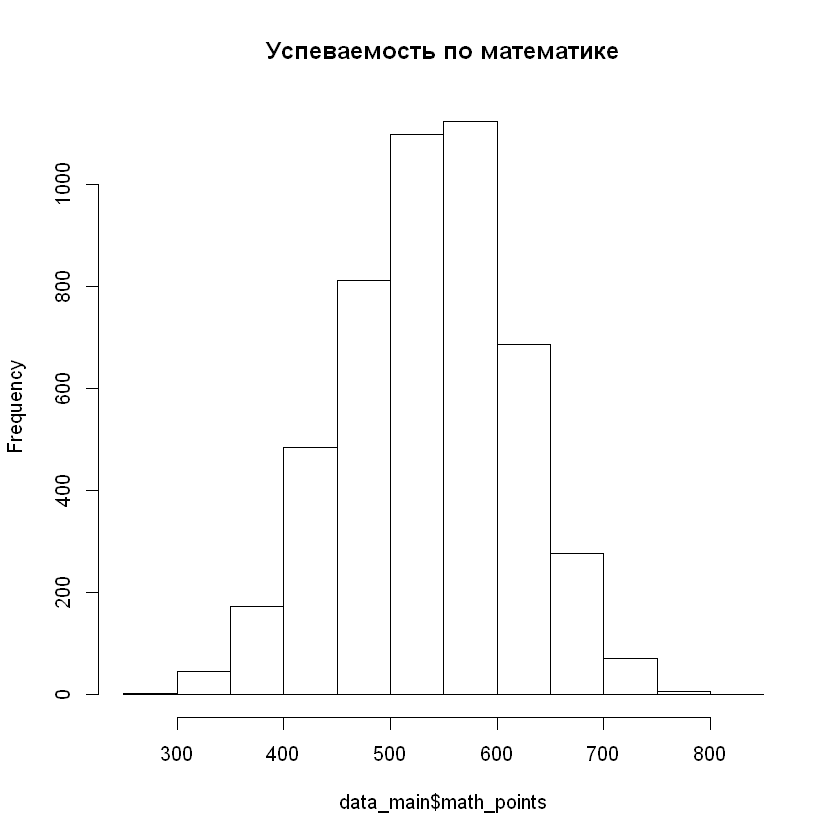

In [111]:
hist(data_main$math_points, main = 'Успеваемость по математике')

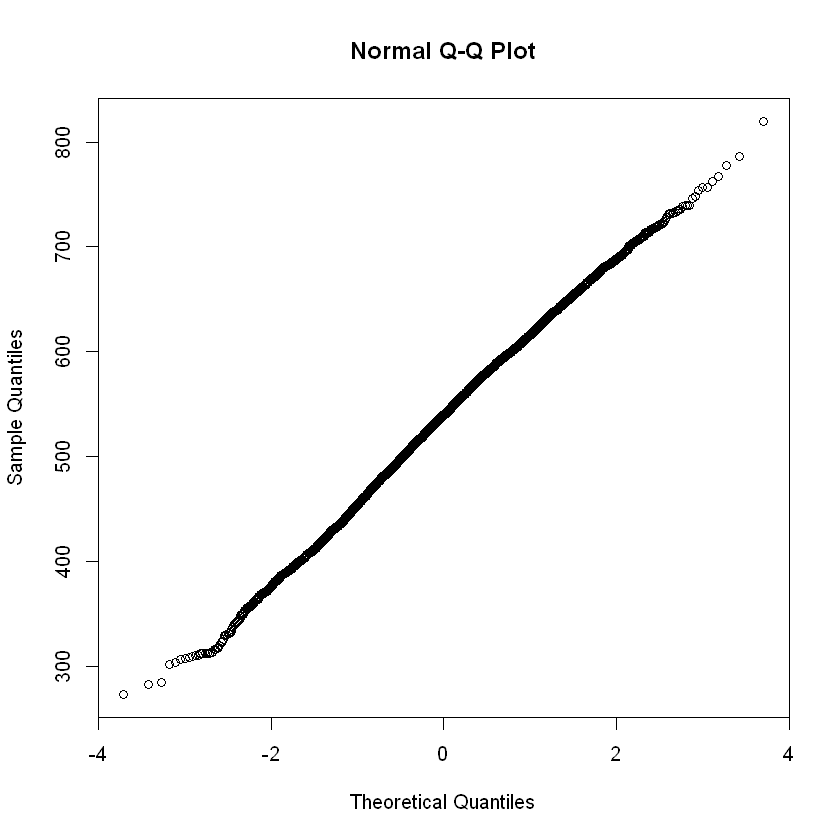

In [112]:
qqnorm(data_main$math_points)

Будем пользоваться техникой backwards для построения линейной регрессии

In [153]:
model = lm(math_points ~ books+own_device+shared_device+age+sex+table+room+internet+telephone+
                         game_console+music_ins+family_car+big_flat+dishwasher+mother_educ+
                         father_educ+ambitions+misses_school+additional_math+like_math+bullying, 
           data = data_main)

In [154]:
summary(model)


Call:
lm(formula = math_points ~ books + own_device + shared_device + 
    age + sex + table + room + internet + telephone + game_console + 
    music_ins + family_car + big_flat + dishwasher + mother_educ + 
    father_educ + ambitions + misses_school + additional_math + 
    like_math + bullying, data = data_main)

Residuals:
     Min       1Q   Median       3Q      Max 
-216.358  -47.024   -0.582   47.371  235.505 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          691.4716    37.7311  18.326  < 2e-16 ***
books11-25 books                       2.5670     4.5175   0.568 0.569909    
books26-100 books                      8.8015     4.4779   1.966 0.049415 *  
books101-200 books                    19.4667     4.9718   3.915 9.16e-05 ***
books>200 books                       13.7346     5.4578   2.517 0.011888 *  
own_deviceNo                          11.8748     3.0037   3.953 7.83e-05 ***
shared_deviceNo 

In [155]:
model2 = update(model, . ~ . - table - room - telephone -internet - bullying)

In [156]:
summary(model2)


Call:
lm(formula = math_points ~ books + own_device + shared_device + 
    age + sex + game_console + music_ins + family_car + big_flat + 
    dishwasher + mother_educ + father_educ + ambitions + misses_school + 
    additional_math + like_math, data = data_main)

Residuals:
     Min       1Q   Median       3Q      Max 
-215.929  -46.668   -0.391   47.056  236.951 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                           684.136     37.453  18.267  < 2e-16 ***
books11-25 books                        2.440      4.499   0.542 0.587656    
books26-100 books                       8.706      4.454   1.955 0.050687 .  
books101-200 books                     19.612      4.950   3.962 7.54e-05 ***
books>200 books                        13.439      5.436   2.472 0.013471 *  
own_deviceNo                           10.162      2.914   3.487 0.000493 ***
shared_deviceNo                       -12.797      2.837  -4.510 6.65e

Мы получили модель где все переменные значимы (факторная переменная значима, если хотя бы один из её уровней имеет значимость). Модель объясняет 24 % дисперсии.

Коэффициент перед дамми переменной показывает на сколько в среднем изменяется значение целевой переменной если мы получим значение уровня, отличное от базового.
Проинтерпритируем результаты:     
- В сравнении с детьми, у которых дома 0-10 книг, дети у которых дома 11-25 книг в среднем набирают в среднем на 2.4 бала больше, 26-100 книг в среднем на 8.7 бала больше, 101-200 книг в среднем на 19.6 бала больше, больше 200 книг в среднем на 13.4 бала больше.
- Дети, у которых нет собственного планшета/компьютера в среднем набирают на 10.16 балов больше, чем те, у кого есть.
- Дети, у которых нет дома общего планшета/компьютера в среднем набирают на 12.8 балов меньше, чем те, у кого есть.

Из этого можно сделать вывод, что наличие у ребенка собственного планшета/компьютера негативно сказывается на его успеваемости по математике, в то время как наличие самого компьютера дома положительно взаимосвязанно с успеваимостью. Так же наличие дома большого количества книг полоительно взаимосвязанно с успеваемостью по математике. К тому же сила связи между количеством книг (при количестве книг > 100) и успеваемостью (13-19) больше, чем сила связи между наличием дома компьютера и успеваемостью(12.8)

### 3.  Добавьте в модель интерактивный эффект . Он улучшил вашу модель? Аргументируйте. Выберите финальную модель, проведите для нее диагностику.

Создадим интерактивный эффект, который будет показывать учеников, желающих получить высшее образование, которые любят математику.

In [166]:
data_main$ambitions_math <- ifelse(((data_main$ambitions  ==  'high')&(data_main$like_math  ==  'Like Learning Mathematics')) | 
                             ((data_main$ambitions  ==  'high')&(data_main$like_math  ==  'Very Much Like Learning Math')) , 
                             "Yes", 'No')

In [168]:
model3 = update(model2, . ~ . + ambitions_math)

In [170]:
summary(model3)


Call:
lm(formula = math_points ~ books + own_device + shared_device + 
    age + sex + game_console + music_ins + family_car + big_flat + 
    dishwasher + mother_educ + father_educ + ambitions + misses_school + 
    additional_math + like_math + ambitions_math, data = data_main)

Residuals:
     Min       1Q   Median       3Q      Max 
-215.207  -46.431   -0.356   47.243  236.652 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          683.8597    37.4556  18.258  < 2e-16 ***
books11-25 books                       2.4637     4.4992   0.548 0.584013    
books26-100 books                      8.7380     4.4545   1.962 0.049869 *  
books101-200 books                    19.6598     4.9505   3.971 7.26e-05 ***
books>200 books                       13.4624     5.4367   2.476 0.013316 *  
own_deviceNo                          10.1826     2.9144   3.494 0.000481 ***
shared_deviceNo                      -12.8358     2.8

Однако наша новая переменная не значима и при этом Adjusted R^2 уменьшился на 0.0001, поэтому мы не будем использовать данный интерактивный эфеект.
Финальной моделью будет model2

In [171]:
final_model = model2

Произведем диагностику финальной модели

In [174]:
library(lmtest)

Warning message:
"package 'lmtest' was built under R version 3.4.3"Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



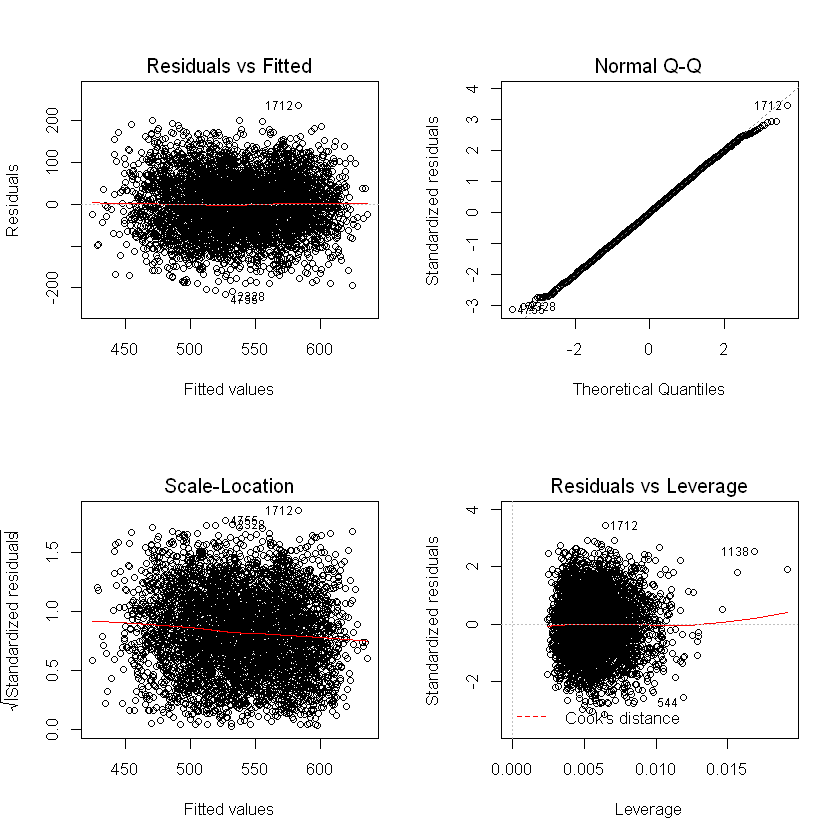

In [173]:
par(mfrow=c(2,2))
plot(final_model)

Тест на гомоскедантичность:

In [175]:
bptest(final_model)


	studentized Breusch-Pagan test

data:  final_model
BP = 76.845, df = 25, p-value = 3.533e-07


В тесте Бройша-Пагана p-value меньше 1%, поэтому мы отвергаем гипотезо о гомоскедантичности данных

Тест на нормальность остатков:

In [176]:
shapiro.test(resid(final_model))


	Shapiro-Wilk normality test

data:  resid(model2)
W = 0.99934, p-value = 0.1011


В тесте Шапиро-Уилка p-value около 10% поэтому предположение о нормальности остатков подтверждается.

Проверим модель на мультиколинеарность:

In [180]:
library(car)
vif(final_model)

,GVIF,Df,GVIF^(1/(2*Df))
books,1.174817,4,1.020343
own_device,1.037710,1,1.018681
shared_device,1.033574,1,1.016648
age,1.017492,1,1.008708
sex,1.096951,1,1.047355
game_console,1.130099,1,1.063061
music_ins,1.084441,1,1.041365
family_car,1.144624,1,1.069871
big_flat,1.086504,1,1.042355
dishwasher,1.133753,1,1.064778


В модели отсутствует мультиколинеарность, так как все значения <5

В силу гетеростедантичность, пересчитаем модель с поправкой на робастные стандартные ошибки:

In [181]:
summary(final_model, robust = TRUE)


Call:
lm(formula = math_points ~ books + own_device + shared_device + 
    age + sex + game_console + music_ins + family_car + big_flat + 
    dishwasher + mother_educ + father_educ + ambitions + misses_school + 
    additional_math + like_math, data = data_main)

Residuals:
     Min       1Q   Median       3Q      Max 
-215.929  -46.668   -0.391   47.056  236.951 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                           684.136     37.453  18.267  < 2e-16 ***
books11-25 books                        2.440      4.499   0.542 0.587656    
books26-100 books                       8.706      4.454   1.955 0.050687 .  
books101-200 books                     19.612      4.950   3.962 7.54e-05 ***
books>200 books                        13.439      5.436   2.472 0.013471 *  
own_deviceNo                           10.162      2.914   3.487 0.000493 ***
shared_deviceNo                       -12.797      2.837  -4.510 6.65e

Зависимая переменная: балы по математике.
Проинтерпретируем результаты:
- В сравнении с детьми, у которых дома 0-10 книг, дети у которых дома 11-25 книг в среднем набирают в среднем на 2.4 бала больше, 26-100 книг в среднем на 8.7 бала больше, 101-200 книг в среднем на 19.6 бала больше, больше 200 книг в среднем на 13.4 бала больше.
- Ученики, у которых нет собственного планшета/компьютера в среднем набирают на 10.16 балов больше, чем те, у кого есть.
- Ученики, у которых нет дома общего планшета/компьютера в среднем набирают на 12.8 балов меньше, чем те, у кого есть.
- Мальчики в среднем больше преуспевают в математике, чем девочки, в среднем набирая на 11.3 балов больше.
- Ученики, у которых нет домашней игровой приставки в среднем набирают на 9 больше малов по математике.
- Ученики, у которых хотя бы один родитель имеет высшее образование в среднем набирают больше балов по математике.
- Ученики, которые планируют получить высшее образование в среднем набирают на 42.9 балов больше.
- Ученики, которые редко пропускают школу, в среднем получают больше балов по математике, чем те, кто пропускает её часто.
- Ученики, у которые очень любят математику в среднем набрают 15 балов больше чем те, кому просто нравится математике, и на 45 больше чем те, кто не любит математику.

### 4.  Для переменных, описывающих домашние ресурсы (BSBG06A, BSBG06B, BSBG06C, BSBG06D, BSBG06E, BSBG06F, BSBG06G, BSBG06H, BSBG06I, BSBG06J, BSBG06K), проведите эксплораторный факторный анализ (EFA). Как много факторов вы получили? Каким типов вращения пользовались и почему? Опишите полученную факторную структуру.

In [189]:
library(polycor)
library(corrgram)
library(psych)

Warning message:
"package 'corrgram' was built under R version 3.4.3"
Attaching package: 'corrgram'

The following object is masked from 'package:plyr':

    baseball



In [190]:
columns_home = c('own_device', 'shared_device', 'table', 'room', 'internet', 
                  'telephone', 'game_console', 'music_ins', 'family_car', 'big_flat', 'dishwasher')
data_home = data_main[, columns_home]

Визуализируем корреляции между признаками

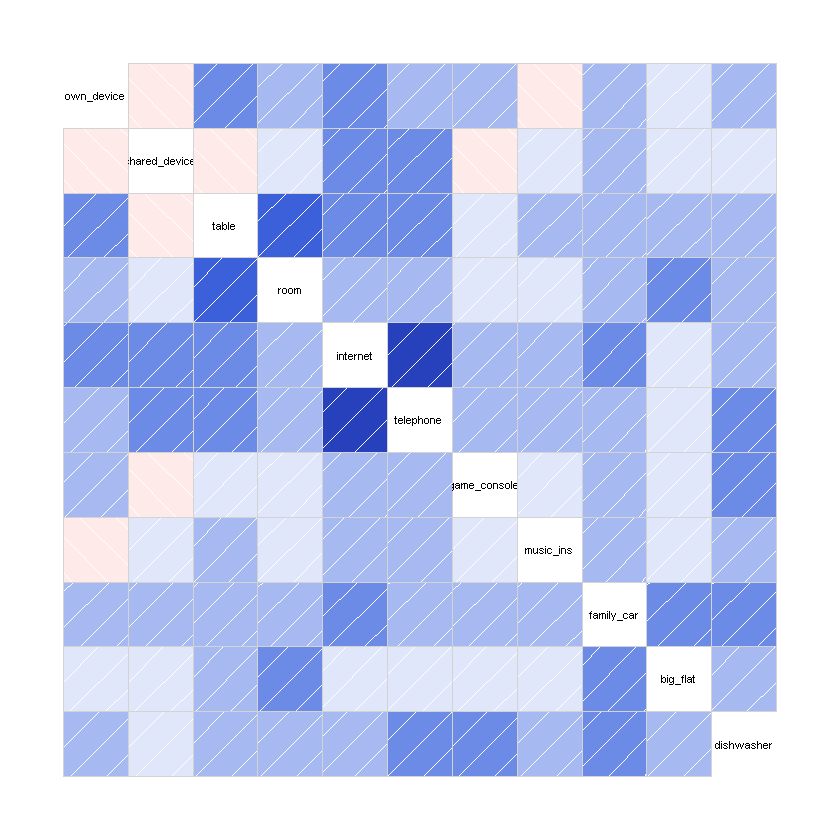

In [191]:
corr = hetcor(data_home)
corrgram(corr$correlations)

Видим сильную корреляцию между наличием своего стола и комнаты, а так же между наличием своего телефон и интернета

Выделим 5 факторов по критерию Кайзера.

Parallel analysis suggests that the number of factors =  5  and the number of components =  4 


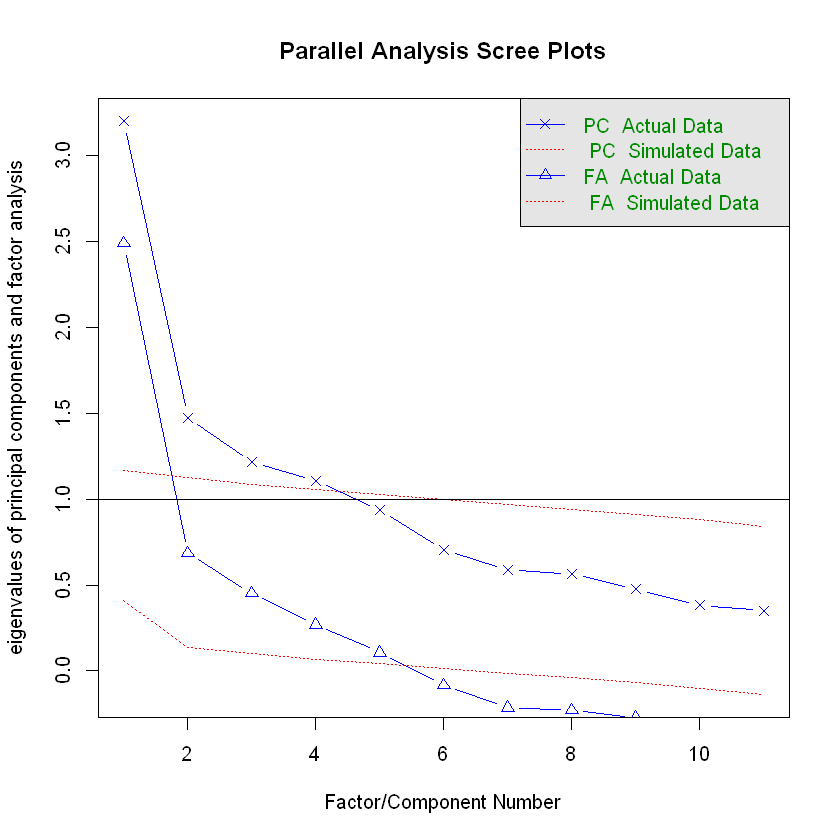

In [193]:
fa.parallel(corr$correlations, n.obs=1000, fa="both", n.iter=300) # Оптимальное количество факторов - 5, где собственные числа матрицы   
                                                     # впервые оказываются ниже горизонтальной линии = 1

Будем использовать наклонный метод вращения, так как он учитывает корреляции между факторами.

In [199]:
our_fa = fa(corr$correlations, nfactors=5, rotate="oblimin", fm="ml")

In [200]:
our_fa

Factor Analysis using method =  ml
Call: fa(r = corr$correlations, nfactors = 5, rotate = "oblimin", fm = "ml")
Standardized loadings (pattern matrix) based upon correlation matrix
                ML2   ML1   ML5   ML3   ML4   h2    u2 com
own_device     0.04  0.05  0.00  0.03  0.76 0.63 0.374 1.0
shared_device  0.67 -0.12 -0.11  0.09 -0.18 0.42 0.579 1.3
table          0.01  0.99  0.00 -0.01  0.01 1.00 0.005 1.0
room          -0.05  0.43  0.02  0.32  0.06 0.36 0.637 1.9
internet       0.71  0.10 -0.01  0.01  0.20 0.66 0.343 1.2
telephone      0.57  0.13  0.31 -0.13  0.04 0.60 0.399 1.8
game_console  -0.05 -0.16  0.52  0.02  0.26 0.37 0.629 1.7
music_ins      0.19  0.12  0.28 -0.01 -0.19 0.16 0.839 3.0
family_car     0.27 -0.02  0.18  0.37  0.05 0.33 0.670 2.4
big_flat      -0.01  0.02  0.04  0.73  0.02 0.56 0.437 1.0
dishwasher     0.01  0.06  0.71  0.10 -0.06 0.55 0.446 1.1

                       ML2  ML1  ML5  ML3  ML4
SS loadings           1.48 1.34 1.12 0.88 0.83
Proportion Var  

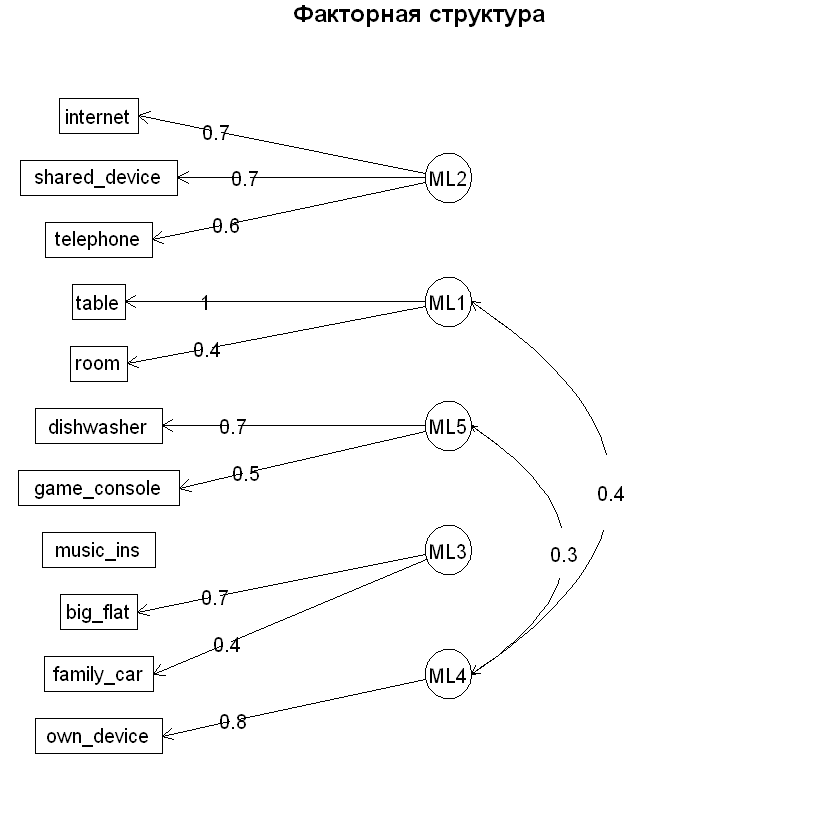

In [201]:
fa.diagram(our_fa, main = "Факторная структура")

Проинтерпретируем результаты факторной структуры:
- Фактор 1 состоит из наличия собственного стола и собственной комнаты. Фактор может показывать наличие своего свободного пространства у ученика.
- Фактор 2 состоит из наличия интернета, общего планшета/компьютера и собственного телефона. Возможно, при наличии интернета или дефайса ученику проще находить нужную информацию
- Фактор 3 состоит из наличия машины и большой квартиры у семьи. Возможно он показывает наличие большого достатка в семье.
- Фактор 4 состоит из наличия собственного планшета/компьютера у ученика. Так же он влияет на наличие собственного стола/комнаты у ученика
- Фактор 5 состоит из наличия игровой консоли и посудомоечной машины. Вероятно он так же отображает хороший достаток в семье. Этот фактор так же влияет на наличие собственного компьютера у ученика.

### 5.  Проиллюстрируйте полученные результаты регрессии и факторного анализа графиками и диаграммами 

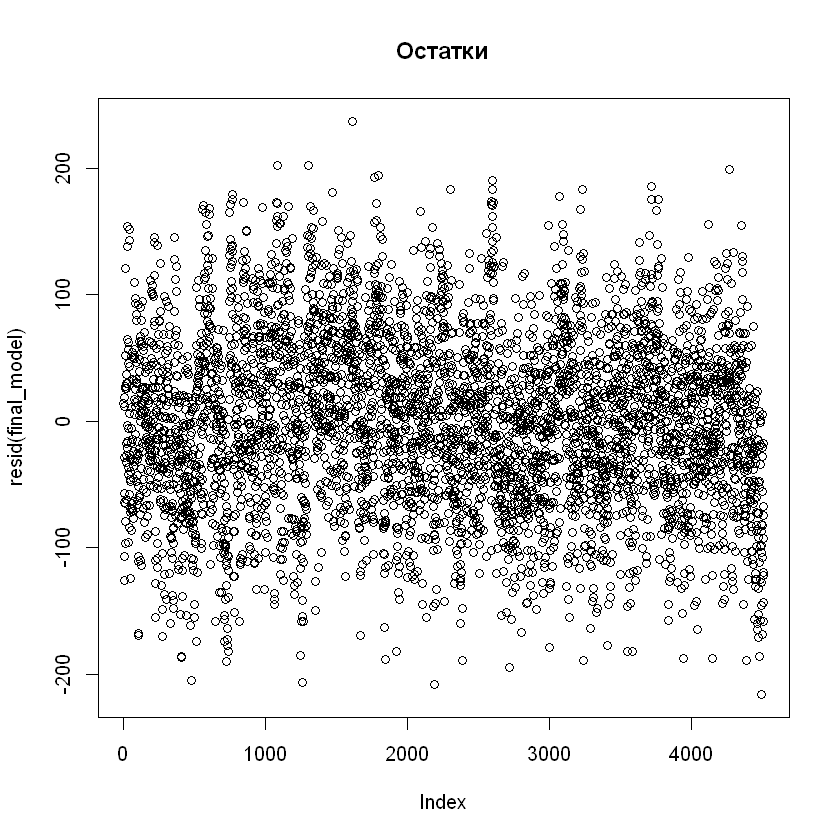

In [204]:
plot(resid(final_model), main = 'Остатки')

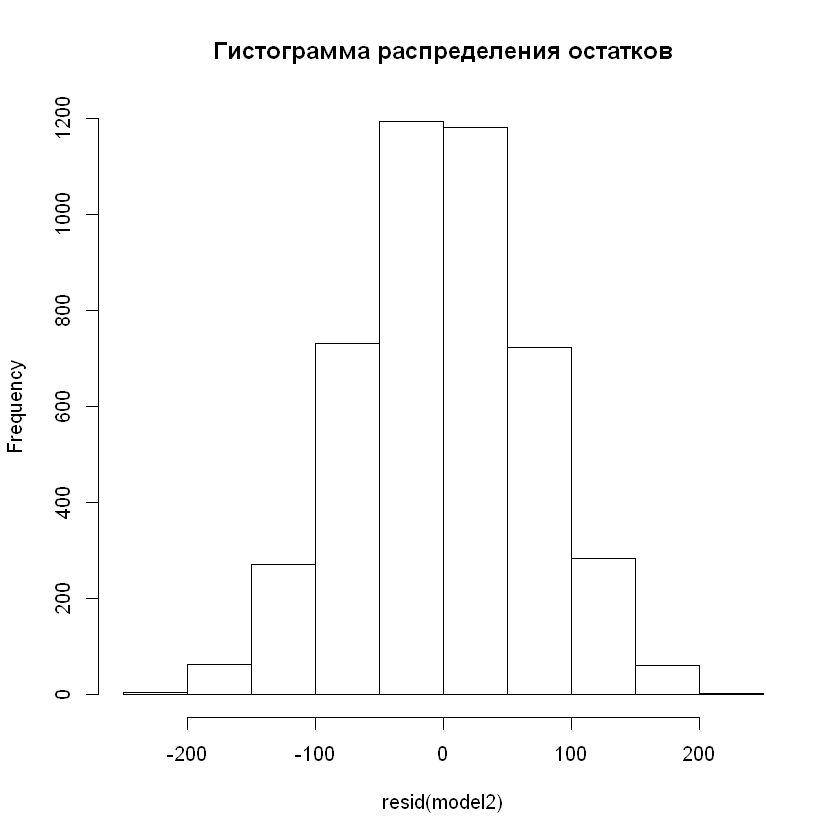

In [205]:
hist(resid(model2),main = 'Гистограмма распределения остатков')

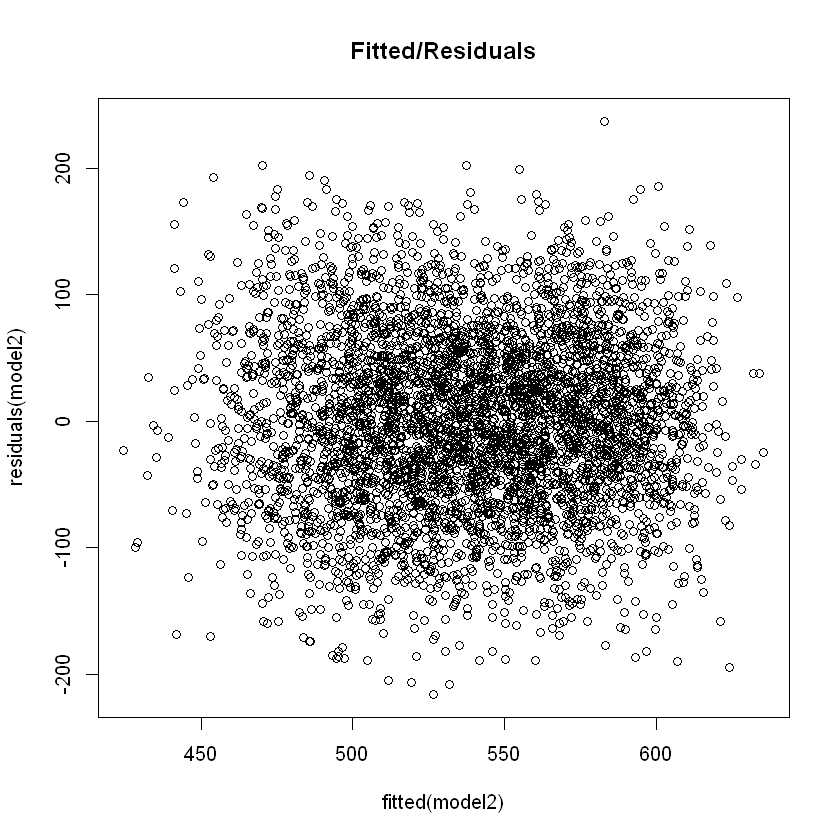

In [206]:
plot(fitted(model2), residuals(model2), main = 'Fitted/Residuals')

In [212]:
library(visreg)

Warning message:
"package 'visreg' was built under R version 3.4.3"

Посмотрим на распредление балов по математике, в зависимости от амбиций ученика и того, как сильно он любит математику

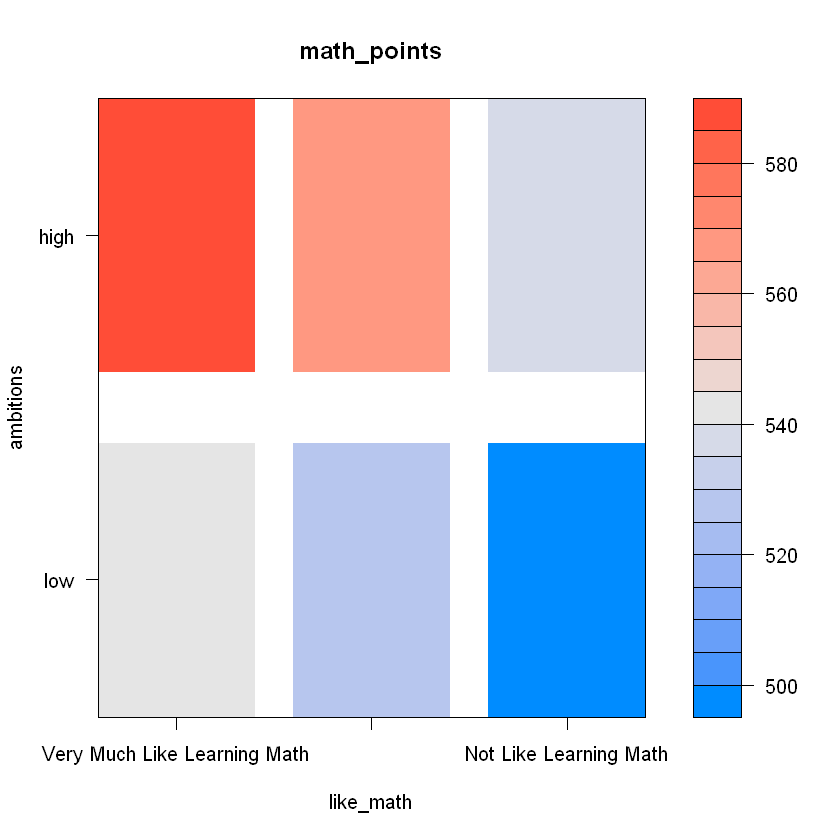

In [213]:
visreg2d(final_model, "like_math", "ambitions", plot.type="image", nn = 200)

Посмотрим на распредление балов по математике, в зависимости от наличия машины и большой квартиры.

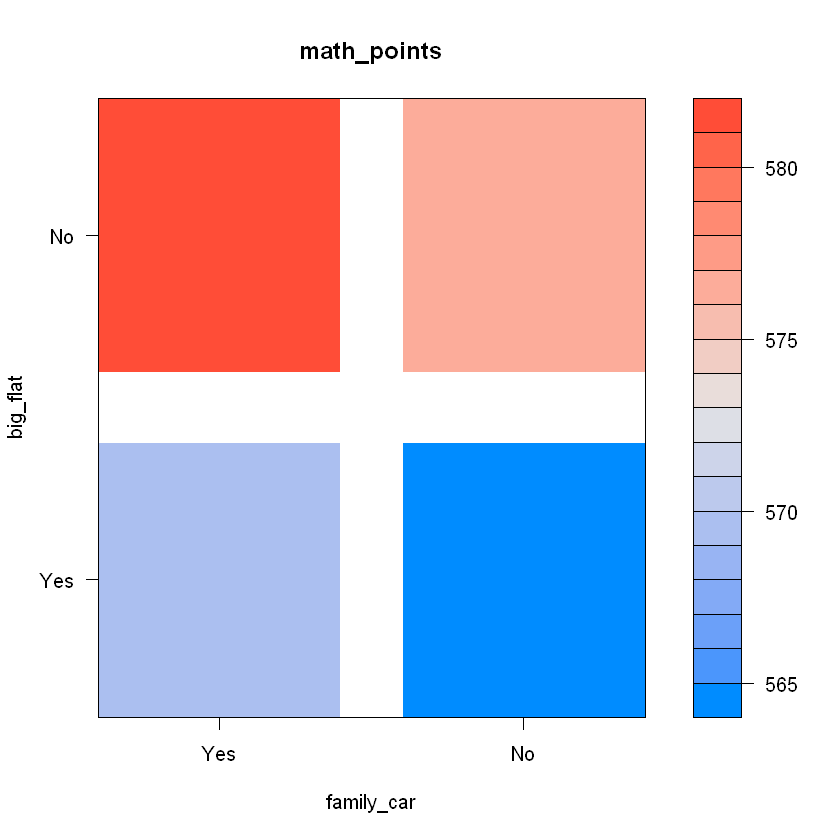

In [215]:
visreg2d(final_model, "family_car", "big_flat", plot.type="image", nn = 200)

## Заключение
В работе было проведено исследование взаимосвязи балов по математике с различными факторами. В результате:
- Была создана модель, доля объясняющей дисперсии которой - 24%. В финальную модель были включены следующиие контрольные перменные: возраст, пол, переменные описывающие домашние ресурсы, образование матери, образование отца, как далеко ученик хочет пойти в учебе, как часто ученик пропускает школу , посещал ли дополнительные уроки по математике, любит ли математику. В моделе нет мультиколинеарности между признаками, а так же остатки распределены нормально.
- На основе модели можно ответить значимы ли для успеваемости ученика по математике количество книг дома и наличие планшета/компьютера. Наличие большого количества книг действительно положительно сказывается на успеваемость по математике, в то время как наличие собственного компьютера негативно сказывается. Однако отсутствие какого либо компьютера дома так же негативно взаимосвязанно с набранным балом по математике.
- Введение интерактивного эффекта, связанного с желанием ученика получить высшее образование и любовью к математике, не дало прироста качества модели.
- С помощью факторного анализа (EFA) было выделено 5 факторов, включающих в себя более 50% вариации.